<a href="https://colab.research.google.com/github/donghuna/AI-Expert/blob/main/%ED%99%A9%EC%8A%B9%EC%9B%90/%5BSamsung_AI_Expert_Day3_Lab2%5D_Multilinguality_%2B_Multimodality_(Student).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multilingual NLP with mBERT
The BERT model, and by extension mBERT (multilingual BERT), is a transformer-based model. It uses a multi-layer bidirectional transformer architecture to process text. The model is pre-trained on a large corpus of text in multiple languages using a masked language modeling (MLM) objective. This enables the model to capture contextual information across different languages.

#### Setting Environment


In [ ]:
!pip install datasets

In [ ]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM, BertForSequenceClassification, pipeline
from datasets import load_dataset
import torch
import pandas as pd

#### Multilingual Masked Language Modeling

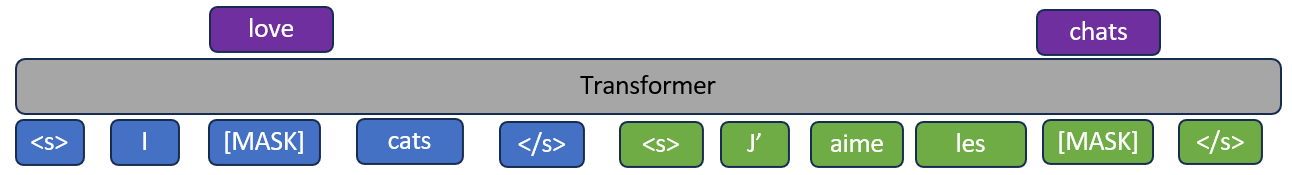

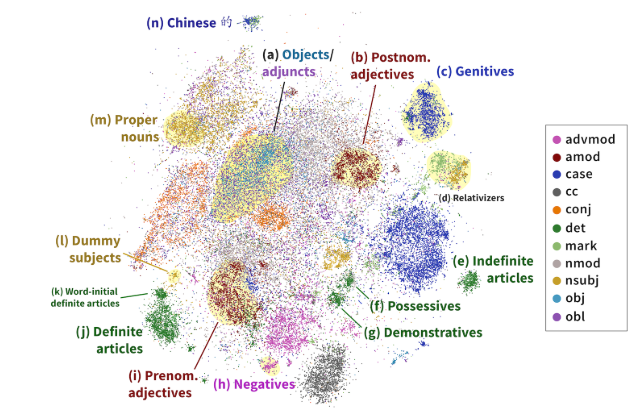

In [ ]:
# Cross-lingual MLM with Pretrained mBERT
# Load the pretrained mBERT model and tokenizer
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)
model.eval()

In [ ]:
# Function to perform MLM
def cross_lingual_mlm(text):
    inputs = tokenizer(text, return_tensors="pt")
    masked_index = torch.where(inputs['input_ids'] == tokenizer.mask_token_id)[1].tolist()[0]

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    masked_token_logits = logits[0, masked_index] # size: output_dim
    predicted_token_id = torch.argmax(masked_token_logits).item()
    predicted_token = tokenizer.decode([predicted_token_id])
    return predicted_token, masked_token_logits

In [ ]:
# Example usage
text = "Question: 돈은 가져 왔니? Answer: No, I forgot to bring my [MASK]."
predicted_token, masked_token_logits = cross_lingual_mlm(text)

print(masked_token_logits.shape)

In [ ]:
# DIY: print top-10 probability

# logits to probability (hint: apply torch.softmax to dimesion 0)
# Your Code Here

# take the idx of top-10 probs
# Your Code Here

# print top-10 tokens with corresponding probs
# Your Code Here

print(f"Original text: {text}")
print(f"Predicted text: {text.replace('[MASK]', predicted_token)}")

#### Multilingual Sentiment Analysis with Fine-tuned mBERT


In [ ]:
# Load fine-tuned mBERT for sentiment analysis
sentiment_model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
sentiment_pipeline = pipeline("sentiment-analysis", model=sentiment_model_name, tokenizer=sentiment_model_name)

In [ ]:
# Show model architecture
sentiment_model = sentiment_pipeline.model
print(sentiment_model)

In [ ]:
# Example usage
texts = ["I love this product!", "Je déteste ce produit.", "Este producto es terrible."]
sentiments = sentiment_pipeline(texts)
for text, sentiment in zip(texts, sentiments):
    print(f"Text: {text}\nSentiment: {sentiment}\n")

#### Cross-lingual Information Retrieval with mBERT

In [ ]:
# Cross-lingual Information Retrieval with mBERT
# Load dataset for IR demonstration
from transformers import AutoTokenizer, AutoModel

# Load pre-trained mBERT model and tokenizer
model_name = "bert-base-multilingual-cased"  # Choose a suitable multilingual model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
!wget -O amazon_review_compact.csv https://drive.google.com/uc?id=1cmLXSCoI8UDgJ6tMq2hTBoZ9-3tGt3O2

In [ ]:
import pandas as pd
import torch

# Load the dataset
dataset = pd.read_csv('./amazon_review_compact.csv')
M = 3200
dataset = dataset.head(M)
dataset.head()

In [ ]:
# Function to perform cross-lingual IR
def cross_lingual_ir(query, dataset, top_k=3, bsz=32):
    query_embedding = model(**tokenizer(query, return_tensors="pt"))["last_hidden_state"].mean(dim=1)
    similarities = []

    for i in range(0, len(dataset), bsz):
        batch = dataset.iloc[i:i+bsz,1]

        # Print progress
        if (i//bsz) % 10 == 0:
            print(f"Batch {i//bsz} of {len(dataset)//bsz}")

        # Convert the Pandas Series to a list of strings explicitly
        batch_text = batch.astype(str).tolist()  # Ensure each element is treated as a string

        # get batch embedding
        batch_embedding = model(**tokenizer(batch_text, return_tensors="pt", padding=True))["last_hidden_state"].mean(dim=1)
        # calculate cosine similarity
        similarities.extend(torch.cosine_similarity(query_embedding, batch_embedding, dim=1).tolist())

    top_indices = torch.argsort(torch.tensor(similarities))[-top_k:].numpy() # Convert to numpy array and extract indices
    return [(dataset.iloc[idx][1], similarities[idx]) for idx in top_indices]

In [ ]:
# Example usage
query = "재미없는 영화였습니다."
results = cross_lingual_ir(query, dataset)
print(f"Query: {query}")
for result in results:
  print(f"Context: {result[0]}\nSimilarity: {result[1]}\n")

## Multimodality (CLIP)

CLIP consists of two main components:

An image encoder: A Vision Transformer (ViT) that converts images into embeddings.
A text encoder: A Transformer model that converts text into embeddings.
These two encoders are trained jointly to ensure that the embeddings from both modalities are comparable, allowing for tasks like image-text similarity and zero-shot classification.

####  Vision Transformer (ViT) Architecture
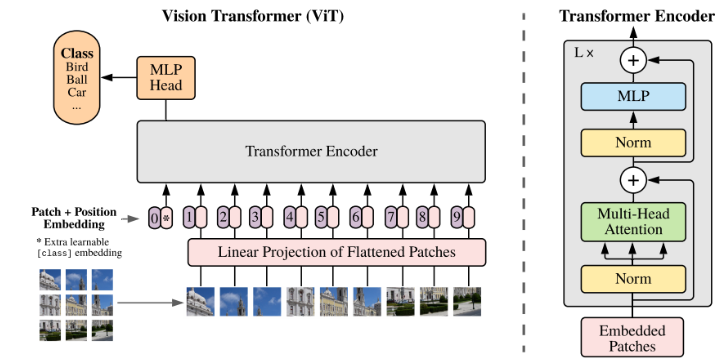

#### Contrastive Language-Image Pretraining (CLIP)

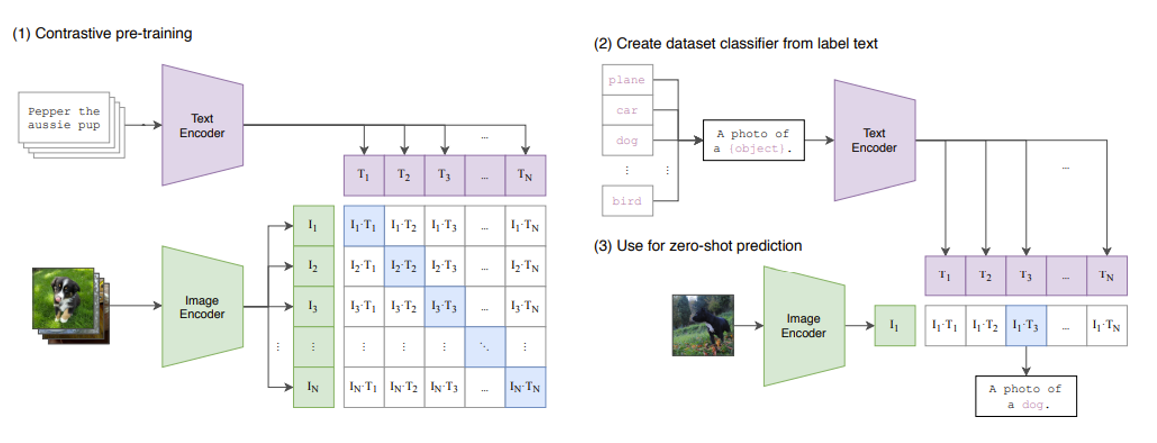

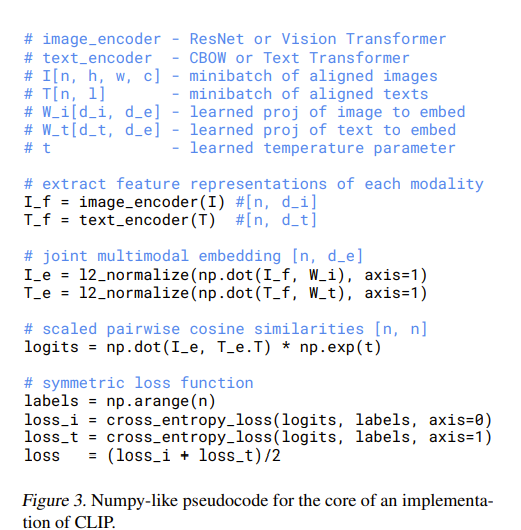

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import requests
from io import BytesIO

# Load the model and processor
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# show model architecture
print(model)

#### Image classification using CLIP

In [ ]:
# Download an image
!mkdir -p images
!wget -O images/image_0.jpg https://drive.google.com/uc?id=16JG1xnex-FqzGvCqFhe0Ab99sMW28rIq
!wget -O images/image_1.jpg https://drive.google.com/uc?id=18ccfy_X3KZGRvg2Q1ijgl0K_n3KxucKb
!wget -O images/image_2.jpg https://drive.google.com/uc?id=1Q1I0yEsCAATyjlmdcG9GJY1X9tbxf2dQ

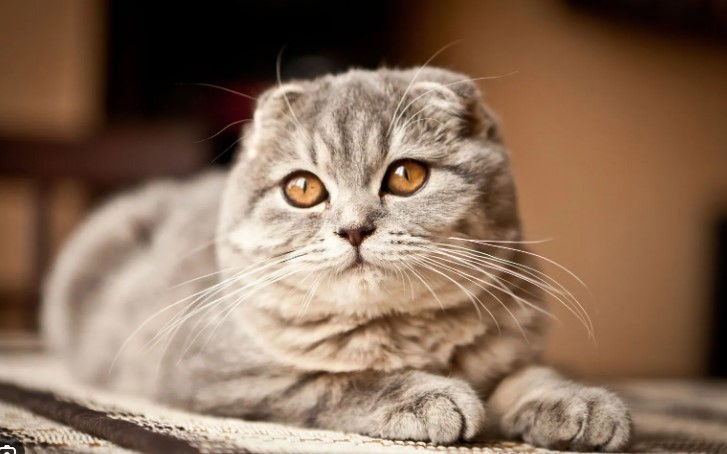

In [ ]:
# show images
Image.open("images/image_0.jpg")

In [ ]:
# Load image as an object
image = Image.open("images/image_0.jpg")

# Define possible labels
labels = ["a dog", "a cat", "a person", "a car"]

# Preprocess the inputs
inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

# Get the image and text features
outputs = model(**inputs)

# Compute logits
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
print(logits_per_image.shape)

In [ ]:
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

# Print the results
for i, label in enumerate(labels):
    print(f"Label: {label}, Probability: {probs[0][i].item():.4f}")

#### Text-to-image retrieval

In [ ]:
import matplotlib.pyplot as plt

# Load multiple images
images = [Image.open(f"images/image_{i}.jpg") for i in range(3)]

# Define the query text
query = "a beautiful beach"

# Preprocess the inputs
inputs = processor(text=[query], images=images, return_tensors="pt", padding=True)

# Get the image and text features
outputs = model(**inputs)

# Compute logits
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=0) # we can take the softmax to get the label probabilities

# Find the best matching image
best_match_idx = probs.argmax()

# Display the best matching image
best_match_image = images[best_match_idx]

plt.imshow(best_match_image)
plt.title(f"Best match for query: '{query}'")
plt.axis('off')
plt.show()

In [ ]:
print(probs)

## Advanced Materials

### Huggingface Implementation

Transformers: https://github.com/huggingface/transformers/tree/main/src/transformers/models

### Selected Papers

*  "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" (BERT, 2017): https://arxiv.org/abs/1810.04805
*   "XTREME: A Massively Multilingual Multi-task Benchmark
for Evaluating Cross-lingual Generalization (2020)": https://arxiv.org/abs/2003.11080
*  "An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale" (Vision Transformer, 2020): https://arxiv.org/abs/2010.11929
*   "Learning Transferable Visual Models From Natural Language Supervision" (CLIP, 2021): https://arxiv.org/abs/2103.00020
*   "BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation" (BLIP, 2022): https://arxiv.org/abs/2201.12086
*    "BLIP-2: Bootstrapping Language-Image Pre-training with Frozen Image Encoders and Large Language Models" (BLIP-2, 2023): https://arxiv.org/abs/2301.12597
*   "Visual Instruction Tuning" (LLaVa, 2023): https://arxiv.org/abs/2304.08485

